## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  15.476677  1446.793955  0.364114  8.975863  1.580782
1  46.891511  1591.657609  0.428150  4.401310  1.341000
2  67.717437   990.101679  0.617929  2.362972  1.466759
3  33.930862  1063.263273  0.304914  5.309884  1.354241
4  40.292661   565.646187  0.843170  2.694994  1.544885


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.07454 | train_mse: 4.67803 | train_mae: 1.5643  |  0:00:00s
epoch 1  | loss: 0.53251 | train_mse: 7.04183 | train_mae: 1.75381 |  0:00:00s
epoch 2  | loss: 0.38234 | train_mse: 6.26284 | train_mae: 1.69845 |  0:00:00s
epoch 3  | loss: 0.36242 | train_mse: 4.01287 | train_mae: 1.31173 |  0:00:00s


epoch 4  | loss: 0.39623 | train_mse: 2.51643 | train_mae: 0.99808 |  0:00:00s
epoch 5  | loss: 0.40781 | train_mse: 1.00896 | train_mae: 0.69445 |  0:00:00s
epoch 6  | loss: 0.32792 | train_mse: 0.7171  | train_mae: 0.61868 |  0:00:00s


epoch 7  | loss: 0.29082 | train_mse: 0.94423 | train_mae: 0.72266 |  0:00:00s
epoch 8  | loss: 0.36895 | train_mse: 1.21694 | train_mae: 0.80232 |  0:00:00s
epoch 9  | loss: 0.27353 | train_mse: 1.25624 | train_mae: 0.78092 |  0:00:00s
epoch 10 | loss: 0.33494 | train_mse: 1.24208 | train_mae: 0.74644 |  0:00:00s


epoch 11 | loss: 0.17881 | train_mse: 1.16349 | train_mae: 0.7658  |  0:00:00s
epoch 12 | loss: 0.43604 | train_mse: 0.92833 | train_mae: 0.68956 |  0:00:01s
epoch 13 | loss: 0.26984 | train_mse: 1.05274 | train_mae: 0.71996 |  0:00:01s


epoch 14 | loss: 0.2774  | train_mse: 1.06069 | train_mae: 0.71101 |  0:00:01s
epoch 15 | loss: 0.29672 | train_mse: 1.38423 | train_mae: 0.79178 |  0:00:01s
epoch 16 | loss: 0.2626  | train_mse: 1.11986 | train_mae: 0.72978 |  0:00:01s


epoch 17 | loss: 0.2161  | train_mse: 1.0911  | train_mae: 0.70971 |  0:00:01s
epoch 18 | loss: 0.23473 | train_mse: 0.95447 | train_mae: 0.65541 |  0:00:01s
epoch 19 | loss: 0.24495 | train_mse: 0.59406 | train_mae: 0.4923  |  0:00:01s


epoch 20 | loss: 0.32096 | train_mse: 0.46165 | train_mae: 0.44719 |  0:00:01s
epoch 21 | loss: 0.3249  | train_mse: 0.47223 | train_mae: 0.45257 |  0:00:01s
epoch 22 | loss: 0.38538 | train_mse: 0.82165 | train_mae: 0.59713 |  0:00:01s
epoch 23 | loss: 0.24346 | train_mse: 0.67687 | train_mae: 0.54024 |  0:00:01s


epoch 24 | loss: 0.44453 | train_mse: 0.22447 | train_mae: 0.35165 |  0:00:01s
epoch 25 | loss: 0.37725 | train_mse: 0.18559 | train_mae: 0.33021 |  0:00:01s
epoch 26 | loss: 0.17934 | train_mse: 0.30461 | train_mae: 0.41096 |  0:00:02s


epoch 27 | loss: 0.16894 | train_mse: 0.55283 | train_mae: 0.53383 |  0:00:02s
epoch 28 | loss: 0.3404  | train_mse: 0.89058 | train_mae: 0.62681 |  0:00:02s
epoch 29 | loss: 0.26858 | train_mse: 0.55937 | train_mae: 0.50466 |  0:00:02s
epoch 30 | loss: 0.17215 | train_mse: 0.20666 | train_mae: 0.34294 |  0:00:02s


epoch 31 | loss: 0.14004 | train_mse: 0.18706 | train_mae: 0.32102 |  0:00:02s
epoch 32 | loss: 0.22785 | train_mse: 0.17125 | train_mae: 0.31278 |  0:00:02s
epoch 33 | loss: 0.16637 | train_mse: 0.16656 | train_mae: 0.31084 |  0:00:02s
epoch 34 | loss: 0.1736  | train_mse: 0.21681 | train_mae: 0.3454  |  0:00:02s


epoch 35 | loss: 0.33541 | train_mse: 0.19106 | train_mae: 0.30424 |  0:00:02s
epoch 36 | loss: 0.19271 | train_mse: 0.1391  | train_mae: 0.27357 |  0:00:02s
epoch 37 | loss: 0.247   | train_mse: 0.19757 | train_mae: 0.32675 |  0:00:02s
epoch 38 | loss: 0.09745 | train_mse: 0.26453 | train_mae: 0.35831 |  0:00:02s


epoch 39 | loss: 0.19935 | train_mse: 0.21229 | train_mae: 0.32696 |  0:00:02s
epoch 40 | loss: 0.12002 | train_mse: 0.13023 | train_mae: 0.26692 |  0:00:02s
epoch 41 | loss: 0.17074 | train_mse: 0.11029 | train_mae: 0.24973 |  0:00:03s


epoch 42 | loss: 0.13768 | train_mse: 0.13389 | train_mae: 0.27266 |  0:00:03s
epoch 43 | loss: 0.17764 | train_mse: 0.11341 | train_mae: 0.24977 |  0:00:03s
epoch 44 | loss: 0.15096 | train_mse: 0.10786 | train_mae: 0.24375 |  0:00:03s
epoch 45 | loss: 0.12352 | train_mse: 0.08929 | train_mae: 0.22276 |  0:00:03s


epoch 46 | loss: 0.12538 | train_mse: 0.08498 | train_mae: 0.21642 |  0:00:03s
epoch 47 | loss: 0.19788 | train_mse: 0.09207 | train_mae: 0.22639 |  0:00:03s
epoch 48 | loss: 0.13209 | train_mse: 0.12678 | train_mae: 0.26575 |  0:00:03s


epoch 49 | loss: 0.30615 | train_mse: 0.14119 | train_mae: 0.28084 |  0:00:03s
epoch 50 | loss: 0.17903 | train_mse: 0.16238 | train_mae: 0.29371 |  0:00:03s


epoch 51 | loss: 0.23802 | train_mse: 0.11578 | train_mae: 0.24979 |  0:00:03s
epoch 52 | loss: 0.13403 | train_mse: 0.12009 | train_mae: 0.26193 |  0:00:03s
epoch 53 | loss: 0.26002 | train_mse: 0.1105  | train_mae: 0.2508  |  0:00:04s


epoch 54 | loss: 0.09577 | train_mse: 0.12857 | train_mae: 0.25893 |  0:00:04s
epoch 55 | loss: 0.18803 | train_mse: 0.13031 | train_mae: 0.25289 |  0:00:04s
epoch 56 | loss: 0.18611 | train_mse: 0.11061 | train_mae: 0.24713 |  0:00:04s


epoch 57 | loss: 0.11672 | train_mse: 0.09598 | train_mae: 0.23776 |  0:00:04s
epoch 58 | loss: 0.2163  | train_mse: 0.09492 | train_mae: 0.23294 |  0:00:04s
epoch 59 | loss: 0.11574 | train_mse: 0.14242 | train_mae: 0.2776  |  0:00:04s


epoch 60 | loss: 0.21471 | train_mse: 0.17223 | train_mae: 0.2899  |  0:00:04s
epoch 61 | loss: 0.13896 | train_mse: 0.11064 | train_mae: 0.24128 |  0:00:04s
epoch 62 | loss: 0.24829 | train_mse: 0.08368 | train_mae: 0.21786 |  0:00:04s


epoch 63 | loss: 0.19091 | train_mse: 0.08174 | train_mae: 0.21394 |  0:00:04s


epoch 64 | loss: 0.12276 | train_mse: 0.08648 | train_mae: 0.22272 |  0:00:05s
epoch 65 | loss: 0.2175  | train_mse: 0.09367 | train_mae: 0.23715 |  0:00:05s
epoch 66 | loss: 0.12874 | train_mse: 0.07712 | train_mae: 0.20973 |  0:00:05s


epoch 67 | loss: 0.14782 | train_mse: 0.11353 | train_mae: 0.24196 |  0:00:05s
epoch 68 | loss: 0.19955 | train_mse: 0.11043 | train_mae: 0.23685 |  0:00:05s
epoch 69 | loss: 0.34912 | train_mse: 0.1309  | train_mae: 0.25623 |  0:00:05s


epoch 70 | loss: 0.18729 | train_mse: 0.13811 | train_mae: 0.25849 |  0:00:05s
epoch 71 | loss: 0.1841  | train_mse: 0.13681 | train_mae: 0.25458 |  0:00:05s
epoch 72 | loss: 0.14539 | train_mse: 0.09924 | train_mae: 0.23509 |  0:00:05s


epoch 73 | loss: 0.23784 | train_mse: 0.12355 | train_mae: 0.25276 |  0:00:05s
epoch 74 | loss: 0.13956 | train_mse: 0.10692 | train_mae: 0.23159 |  0:00:06s
epoch 75 | loss: 0.11065 | train_mse: 0.10619 | train_mae: 0.24009 |  0:00:06s


epoch 76 | loss: 0.18896 | train_mse: 0.09964 | train_mae: 0.23263 |  0:00:06s
epoch 77 | loss: 0.20052 | train_mse: 0.08122 | train_mae: 0.21067 |  0:00:06s
epoch 78 | loss: 0.26392 | train_mse: 0.09758 | train_mae: 0.22257 |  0:00:06s


epoch 79 | loss: 0.22869 | train_mse: 0.08446 | train_mae: 0.20981 |  0:00:06s
epoch 80 | loss: 0.08214 | train_mse: 0.11915 | train_mae: 0.2346  |  0:00:06s
epoch 81 | loss: 0.15216 | train_mse: 0.21557 | train_mae: 0.29278 |  0:00:06s
epoch 82 | loss: 0.21908 | train_mse: 0.16836 | train_mae: 0.26715 |  0:00:06s


epoch 83 | loss: 0.11388 | train_mse: 0.09656 | train_mae: 0.21979 |  0:00:06s
epoch 84 | loss: 0.23241 | train_mse: 0.07805 | train_mae: 0.20407 |  0:00:06s
epoch 85 | loss: 0.11869 | train_mse: 0.07358 | train_mae: 0.20107 |  0:00:06s
epoch 86 | loss: 0.35479 | train_mse: 0.12692 | train_mae: 0.24357 |  0:00:06s


epoch 87 | loss: 0.16411 | train_mse: 0.17368 | train_mae: 0.28045 |  0:00:06s
epoch 88 | loss: 0.25919 | train_mse: 0.09127 | train_mae: 0.21946 |  0:00:06s
epoch 89 | loss: 0.14794 | train_mse: 0.06995 | train_mae: 0.20348 |  0:00:07s


epoch 90 | loss: 0.19984 | train_mse: 0.07432 | train_mae: 0.20355 |  0:00:07s
epoch 91 | loss: 0.22246 | train_mse: 0.08907 | train_mae: 0.21518 |  0:00:07s
epoch 92 | loss: 0.12531 | train_mse: 0.07644 | train_mae: 0.20365 |  0:00:07s


epoch 93 | loss: 0.13267 | train_mse: 0.08019 | train_mae: 0.21255 |  0:00:07s
epoch 94 | loss: 0.11886 | train_mse: 0.08421 | train_mae: 0.21016 |  0:00:07s
epoch 95 | loss: 0.08424 | train_mse: 0.0757  | train_mae: 0.19358 |  0:00:07s


epoch 96 | loss: 0.10953 | train_mse: 0.06358 | train_mae: 0.18511 |  0:00:07s
epoch 97 | loss: 0.18027 | train_mse: 0.06383 | train_mae: 0.18833 |  0:00:07s
epoch 98 | loss: 0.1506  | train_mse: 0.06448 | train_mae: 0.19272 |  0:00:07s
epoch 99 | loss: 0.08979 | train_mse: 0.07025 | train_mae: 0.19839 |  0:00:07s


epoch 100| loss: 0.16895 | train_mse: 0.08565 | train_mae: 0.20779 |  0:00:07s
epoch 101| loss: 0.10283 | train_mse: 0.07454 | train_mae: 0.2051  |  0:00:07s
epoch 102| loss: 0.18039 | train_mse: 0.07368 | train_mae: 0.20438 |  0:00:07s
epoch 103| loss: 0.1     | train_mse: 0.06288 | train_mae: 0.18806 |  0:00:08s


epoch 104| loss: 0.28929 | train_mse: 0.06731 | train_mae: 0.19049 |  0:00:08s
epoch 105| loss: 0.19891 | train_mse: 0.07018 | train_mae: 0.19858 |  0:00:08s
epoch 106| loss: 0.13109 | train_mse: 0.08127 | train_mae: 0.20961 |  0:00:08s


epoch 107| loss: 0.1619  | train_mse: 0.07551 | train_mae: 0.20121 |  0:00:08s
epoch 108| loss: 0.12599 | train_mse: 0.07426 | train_mae: 0.20243 |  0:00:08s
epoch 109| loss: 0.11642 | train_mse: 0.0653  | train_mae: 0.19027 |  0:00:08s


epoch 110| loss: 0.2884  | train_mse: 0.07385 | train_mae: 0.198   |  0:00:08s
epoch 111| loss: 0.09018 | train_mse: 0.07015 | train_mae: 0.19861 |  0:00:08s
epoch 112| loss: 0.25798 | train_mse: 0.07057 | train_mae: 0.19934 |  0:00:08s


epoch 113| loss: 0.11101 | train_mse: 0.08236 | train_mae: 0.20028 |  0:00:08s
epoch 114| loss: 0.1503  | train_mse: 0.07026 | train_mae: 0.18941 |  0:00:08s
epoch 115| loss: 0.15936 | train_mse: 0.09095 | train_mae: 0.21642 |  0:00:08s


epoch 116| loss: 0.10925 | train_mse: 0.07423 | train_mae: 0.20543 |  0:00:09s
epoch 117| loss: 0.34761 | train_mse: 0.07604 | train_mae: 0.2068  |  0:00:09s
epoch 118| loss: 0.08224 | train_mse: 0.06763 | train_mae: 0.19741 |  0:00:09s


epoch 119| loss: 0.13283 | train_mse: 0.07488 | train_mae: 0.20189 |  0:00:09s
epoch 120| loss: 0.11889 | train_mse: 0.07817 | train_mae: 0.20221 |  0:00:09s
epoch 121| loss: 0.11306 | train_mse: 0.0714  | train_mae: 0.19829 |  0:00:09s
epoch 122| loss: 0.09938 | train_mse: 0.07702 | train_mae: 0.20973 |  0:00:09s


epoch 123| loss: 0.15672 | train_mse: 0.07427 | train_mae: 0.20095 |  0:00:09s
epoch 124| loss: 0.08365 | train_mse: 0.12834 | train_mae: 0.24692 |  0:00:09s
epoch 125| loss: 0.13425 | train_mse: 0.19393 | train_mae: 0.27284 |  0:00:09s


epoch 126| loss: 0.08845 | train_mse: 0.15186 | train_mae: 0.25329 |  0:00:09s
epoch 127| loss: 0.08381 | train_mse: 0.15419 | train_mae: 0.23519 |  0:00:09s
epoch 128| loss: 0.20128 | train_mse: 0.09994 | train_mae: 0.21186 |  0:00:09s
epoch 129| loss: 0.11967 | train_mse: 0.06676 | train_mae: 0.18484 |  0:00:09s


epoch 130| loss: 0.1376  | train_mse: 0.07789 | train_mae: 0.19841 |  0:00:10s
epoch 131| loss: 0.11829 | train_mse: 0.12439 | train_mae: 0.23441 |  0:00:10s
epoch 132| loss: 0.23781 | train_mse: 0.10411 | train_mae: 0.2257  |  0:00:10s


epoch 133| loss: 0.12387 | train_mse: 0.06312 | train_mae: 0.19051 |  0:00:10s
epoch 134| loss: 0.12221 | train_mse: 0.07695 | train_mae: 0.20762 |  0:00:10s
epoch 135| loss: 0.09306 | train_mse: 0.06857 | train_mae: 0.19117 |  0:00:10s
epoch 136| loss: 0.10302 | train_mse: 0.06019 | train_mae: 0.18729 |  0:00:10s


epoch 137| loss: 0.14043 | train_mse: 0.11064 | train_mae: 0.22663 |  0:00:10s
epoch 138| loss: 0.11862 | train_mse: 0.11959 | train_mae: 0.22443 |  0:00:10s
epoch 139| loss: 0.13923 | train_mse: 0.06462 | train_mae: 0.19772 |  0:00:10s


epoch 140| loss: 0.27435 | train_mse: 0.07289 | train_mae: 0.20562 |  0:00:10s
epoch 141| loss: 0.09366 | train_mse: 0.08471 | train_mae: 0.20574 |  0:00:10s
epoch 142| loss: 0.11037 | train_mse: 0.06246 | train_mae: 0.17737 |  0:00:10s
epoch 143| loss: 0.12553 | train_mse: 0.06391 | train_mae: 0.18318 |  0:00:10s


epoch 144| loss: 0.08552 | train_mse: 0.06633 | train_mae: 0.18604 |  0:00:11s
epoch 145| loss: 0.08242 | train_mse: 0.07444 | train_mae: 0.19482 |  0:00:11s
epoch 146| loss: 0.11638 | train_mse: 0.095   | train_mae: 0.21129 |  0:00:11s


epoch 147| loss: 0.27652 | train_mse: 0.0971  | train_mae: 0.21224 |  0:00:11s
epoch 148| loss: 0.14161 | train_mse: 0.06843 | train_mae: 0.19142 |  0:00:11s
epoch 149| loss: 0.15518 | train_mse: 0.0755  | train_mae: 0.20085 |  0:00:11s


epoch 150| loss: 0.1085  | train_mse: 0.07643 | train_mae: 0.19876 |  0:00:11s
epoch 151| loss: 0.09139 | train_mse: 0.06666 | train_mae: 0.1933  |  0:00:11s
epoch 152| loss: 0.14725 | train_mse: 0.06479 | train_mae: 0.19109 |  0:00:11s


epoch 153| loss: 0.22601 | train_mse: 0.08255 | train_mae: 0.2071  |  0:00:11s
epoch 154| loss: 0.16379 | train_mse: 0.08    | train_mae: 0.20198 |  0:00:11s
epoch 155| loss: 0.17883 | train_mse: 0.07944 | train_mae: 0.20372 |  0:00:11s
epoch 156| loss: 0.21613 | train_mse: 0.07909 | train_mae: 0.20666 |  0:00:11s


epoch 157| loss: 0.083   | train_mse: 0.24497 | train_mae: 0.29189 |  0:00:11s
epoch 158| loss: 0.15552 | train_mse: 0.27314 | train_mae: 0.30889 |  0:00:11s
epoch 159| loss: 0.09652 | train_mse: 0.25919 | train_mae: 0.31238 |  0:00:12s


epoch 160| loss: 0.19643 | train_mse: 0.15415 | train_mae: 0.27879 |  0:00:12s
epoch 161| loss: 0.11129 | train_mse: 0.13495 | train_mae: 0.26822 |  0:00:12s
epoch 162| loss: 0.13409 | train_mse: 0.13692 | train_mae: 0.26227 |  0:00:12s
epoch 163| loss: 0.15104 | train_mse: 0.11857 | train_mae: 0.23567 |  0:00:12s


epoch 164| loss: 0.31318 | train_mse: 0.14468 | train_mae: 0.25322 |  0:00:12s
epoch 165| loss: 0.11397 | train_mse: 0.1282  | train_mae: 0.24282 |  0:00:12s
epoch 166| loss: 0.0953  | train_mse: 0.06669 | train_mae: 0.18784 |  0:00:12s
epoch 167| loss: 0.31087 | train_mse: 0.07478 | train_mae: 0.18693 |  0:00:12s


epoch 168| loss: 0.36381 | train_mse: 0.10205 | train_mae: 0.21759 |  0:00:12s
epoch 169| loss: 0.25832 | train_mse: 0.09145 | train_mae: 0.21028 |  0:00:12s
epoch 170| loss: 0.1233  | train_mse: 0.07741 | train_mae: 0.21588 |  0:00:12s
epoch 171| loss: 0.23957 | train_mse: 0.11639 | train_mae: 0.25388 |  0:00:12s


epoch 172| loss: 0.23542 | train_mse: 0.17232 | train_mae: 0.29323 |  0:00:12s
epoch 173| loss: 0.24168 | train_mse: 0.15002 | train_mae: 0.27451 |  0:00:12s
epoch 174| loss: 0.17133 | train_mse: 0.14969 | train_mae: 0.27224 |  0:00:13s
epoch 175| loss: 0.25931 | train_mse: 0.19537 | train_mae: 0.28906 |  0:00:13s


epoch 176| loss: 0.12311 | train_mse: 0.16229 | train_mae: 0.26481 |  0:00:13s
epoch 177| loss: 0.12226 | train_mse: 0.12466 | train_mae: 0.23888 |  0:00:13s
epoch 178| loss: 0.08707 | train_mse: 0.09295 | train_mae: 0.22516 |  0:00:13s
epoch 179| loss: 0.13042 | train_mse: 0.08359 | train_mae: 0.22405 |  0:00:13s


epoch 180| loss: 0.10976 | train_mse: 0.0799  | train_mae: 0.21492 |  0:00:13s
epoch 181| loss: 0.15046 | train_mse: 0.09424 | train_mae: 0.22072 |  0:00:13s
epoch 182| loss: 0.14084 | train_mse: 0.17395 | train_mae: 0.25951 |  0:00:13s
epoch 183| loss: 0.14012 | train_mse: 0.23449 | train_mae: 0.28712 |  0:00:13s


epoch 184| loss: 0.25598 | train_mse: 0.17373 | train_mae: 0.26331 |  0:00:13s
epoch 185| loss: 0.09537 | train_mse: 0.09166 | train_mae: 0.21538 |  0:00:13s
epoch 186| loss: 0.27258 | train_mse: 0.0767  | train_mae: 0.20228 |  0:00:13s
epoch 187| loss: 0.21803 | train_mse: 0.10576 | train_mae: 0.23123 |  0:00:13s


epoch 188| loss: 0.2159  | train_mse: 0.11502 | train_mae: 0.24435 |  0:00:13s
epoch 189| loss: 0.20431 | train_mse: 0.09483 | train_mae: 0.2359  |  0:00:14s
epoch 190| loss: 0.10763 | train_mse: 0.11072 | train_mae: 0.24528 |  0:00:14s


epoch 191| loss: 0.19655 | train_mse: 0.11259 | train_mae: 0.24607 |  0:00:14s
epoch 192| loss: 0.10415 | train_mse: 0.07283 | train_mae: 0.2134  |  0:00:14s

Early stopping occurred at epoch 192 with best_epoch = 142 and best_train_mae = 0.17737
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

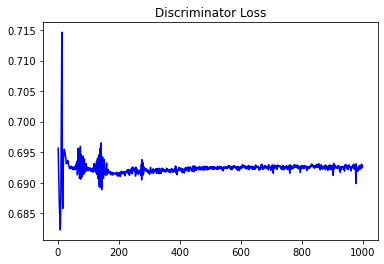

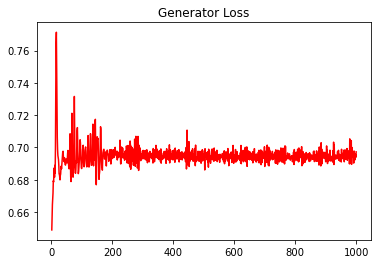

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.7185177289722617


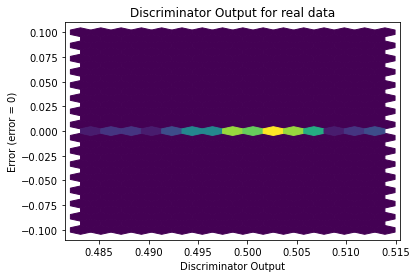

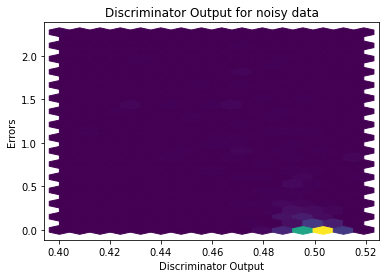

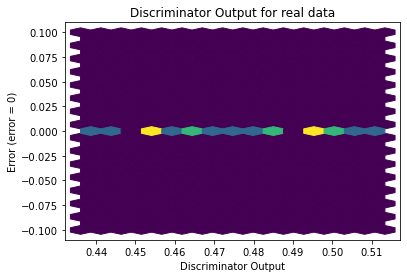

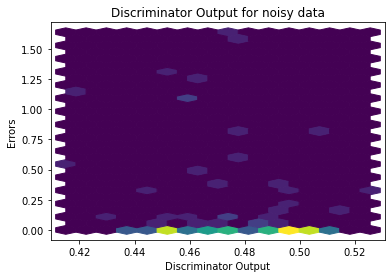

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


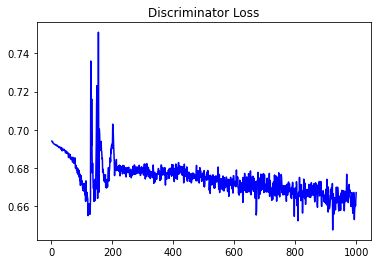

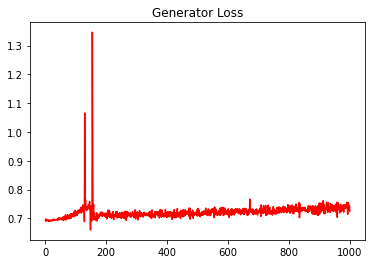

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6731557812874516


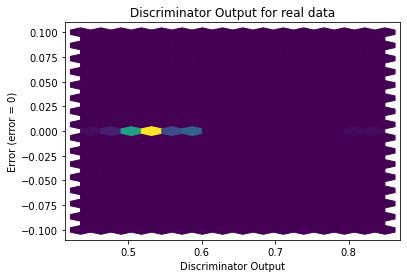

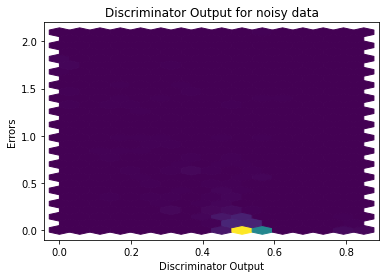

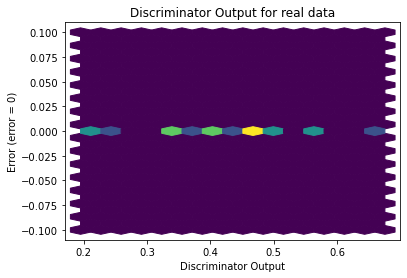

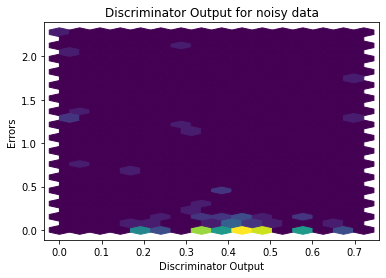

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0695]], requires_grad=True)
